# Neural Alignment Theory

In [348]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.patches as mpatches
import seaborn as sns; sns.set_style("whitegrid")

# Translation Symmetry


$$y_1 = \frac{e^{w_1x}}{e^{w_1x} + e^{w_2x}} \qquad y_2 = \frac{e^{w_2x}}{e^{w_1x} + e^{w_2x}}$$


In [125]:
def translation(w1, w2):
    dy1 = np.random.randn(1)
    dy2 = np.random.randn(1)
    x = np.random.randn(1)
    
    y1 = np.exp(w1 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    y2 = np.exp(w2 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    
    dy1_a1 = y1 - y1**2
    dy1_a2 = -y1 * y2
    dy2_a1 = -y1 * y2
    dy2_a2 = y2 - y2**2
    
    dw1 = (dy1 * dy1_a1 + dy2 * dy2_a1) * x
    dw2 = (dy1 * dy1_a2 + dy2 * dy2_a2) * x
    
    return dw1, dw2

# Scale Symmetry


In [126]:
def scale(w1, w2):
    m = 32
    dY = np.random.randn(m)
    X1 = np.random.randn(m)
    X2 = np.random.randn(m)
    
    A = []
    for (x1, x2) in zip(X1, X2):
        A.append(w1 * x1 + w2 * x2)
    
    mu = 0
    for a in A:
        mu += a / m
    
    var = 0
    for a in A:
        var += (a - mu)**2 / m
    std = np.sqrt(var)# + 10**-10)
    
    dA = [0 for i in range(m)]
    for i in range(m):
        # dyi * dyi_dai
        dA[i] += dY[i] * ((1 - 1/m)/std - (A[i]-mu)**2/(m*std**3))
        for j in range(m):
            # dyj * dyj_dai
            if i is not j:
                dA[i] += dY[j] * ((-1/m)/std - (A[j]-mu)*(A[i]-mu)/(m*std**3))
    
    dw1 = 0
    dw2 = 0
    for (da, x1, x2) in zip(dA, X1, X2):
        dw1 += da * x1
        dw2 += da * x2
    
    return dw1, dw2

# Inverse Symmetry



$$\mathcal{L}(w_1,w_2) = \frac{1}{2}(y - w_2w_1x)^2$$

In [119]:
def inversion(w1, w2):
    dy = np.random.randn(1)
    x = np.random.randn(1)
    
    dw1 = dy * w2 *  x
    dw2 = dy  * w1 * x
    
    return dw1, dw2

In [159]:
@interact_manual(Symmetry=[('Translation',translation),
                     ('Scale',scale),
                     ('Inversion',inversion)])
def visualize(Symmetry):
    
    # Vector Fields
    n = 2
    w1, w2 = np.meshgrid(np.linspace(-n, n, 50), np.linspace(-n, n, 50))
    dw1, dw2 = Symmetry(w1, w2)
    M = np.hypot(dw1, dw2)

    # Plot
    plt.figure(figsize=(10,10))
    ax = fig.add_subplot(221)
    plt.xlim(-n, n)
    plt.ylim(-n, n)
    ax.set_xlabel('$w_1$', size=40, weight='light')
    ax.set_ylabel('$w_2$', size=40, weight='light')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_yticks([-n,-n/2,0,n/2,n])
    ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_xticks([-n,-n/2,0,n/2,n])
    strm = plt.streamplot(w1, w2, dw1, dw2, color=M, cmap='cool', arrowsize=2, density=0.75)
    plt.colorbar(strm.lines)
    # plt.quiver(w1, w2, dw1, dw2)
    for edge in ['bottom','top','right','left']:
        ax.spines[edge].set_linewidth(1)
        ax.spines[edge].set_color('k')
    plt.show()

interactive(children=(Dropdown(description='Symmetry', options=(('Translation', <function translation at 0x1a1…

# Individual Figures

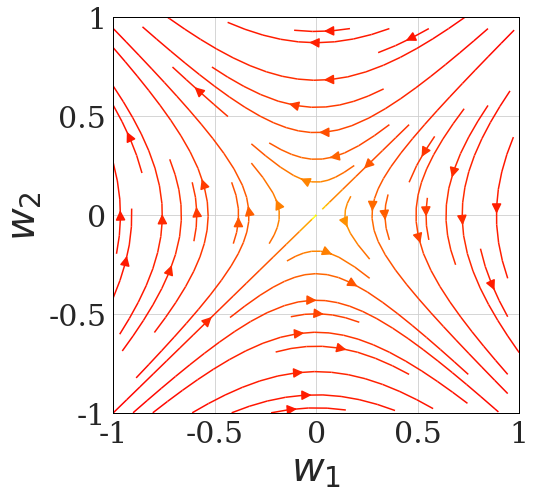

In [353]:
# Plot Specifics
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    cbar.ax.locator_params()#nbins=3
    return cbar
fig = plt.figure(figsize=(16,16))
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)

def translation(w1, w2):
    dy1 = np.random.randn(1)
    dy2 = np.random.randn(1)
    x = np.random.randn(1)
    
    y1 = np.exp(w1 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    y2 = np.exp(w2 * x) / (np.exp(w1 * x) + np.exp(w2 * x))
    
    dy1_a1 = y1 - y1**2
    dy1_a2 = -y1 * y2
    dy2_a1 = -y1 * y2
    dy2_a2 = y2 - y2**2
    
    dw1 = (dy1 * dy1_a1 + dy2 * dy2_a1) * x
    dw2 = (dy1 * dy1_a2 + dy2 * dy2_a2) * x
    
    return dw1, dw2

def scale(w1, w2):
    m = 32
    dY = np.random.randn(m)
    X1 = np.random.randn(m)
    X2 = np.random.randn(m)
    
    A = []
    for (x1, x2) in zip(X1, X2):
        A.append(w1 * x1 + w2 * x2)
    
    mu = 0
    for a in A:
        mu += a / m
    
    var = 0
    for a in A:
        var += (a - mu)**2 / m
    std = np.sqrt(var)# + 10**-10)
    
    dA = [0 for i in range(m)]
    for i in range(m):
        # dyi * dyi_dai
        dA[i] += dY[i] * ((1 - 1/m)/std - (A[i]-mu)**2/(m*std**3))
        for j in range(m):
            # dyj * dyj_dai
            if i is not j:
                dA[i] += dY[j] * ((-1/m)/std - (A[j]-mu)*(A[i]-mu)/(m*std**3))
    
    dw1 = 0
    dw2 = 0
    for (da, x1, x2) in zip(dA, X1, X2):
        dw1 += da * x1
        dw2 += da * x2
    
    return dw1, dw2

def inversion(w1, w2):
    dy = np.random.randn(1)
    x = np.random.randn(1)
    
    dw1 = dy * w2 *  x
    dw2 = dy  * w1 * x
    
    return dw1, dw2

# Vector Fields
n = 1
w1, w2 = np.meshgrid(np.linspace(-n, n, 50), np.linspace(-n, n, 50))
dw1, dw2 = inversion(w1, w2)
M = np.hypot(dw1, dw2)

# Plot
ax = fig.add_subplot(221)
plt.xlim(-n, n)
plt.ylim(-n, n)
ax.set_xlabel('$w_1$', size=40, weight='light')
ax.set_ylabel('$w_2$', size=40, weight='light')
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_yticks([-n,-n/2,0,n/2,n])
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.set_xticks([-n,-n/2,0,n/2,n])
strm = plt.streamplot(w1, w2, dw1, dw2, color=M, norm=matplotlib.colors.LogNorm(vmin=M.min(), vmax=M.max()), cmap='autumn_r', arrowsize=2, density=0.75)
# colorbar(strm.lines)
# plt.quiver(w1, w2, dw1, dw2)
for edge in ['bottom','top','right','left']:
    ax.spines[edge].set_linewidth(1)
    ax.spines[edge].set_color('k')
plt.savefig('inversion.pdf', format='pdf', bbox_inches='tight')

# 3D Figures

In [221]:
def scale_3D(w1, w2, w3):
    m = 32
    dY = np.random.randn(m)
    X1 = np.random.randn(m)
    X2 = np.random.randn(m)
    X3 = np.random.randn(m)
    
    A = []
    for (x1, x2, x3) in zip(X1, X2, X3):
        A.append(w1*x1 + w2*x2 + w3*x3)
    
    mu = 0
    for a in A:
        mu += a / m
    
    var = 0
    for a in A:
        var += (a - mu)**2 / m
    std = np.sqrt(var)
    
    dA = [0 for i in range(m)]
    for i in range(m):
        # dyi * dyi_dai
        dA[i] += dY[i] * ((1 - 1/m)/std - (A[i]-mu)**2/(m*std**3))
        for j in range(m):
            # dyj * dyj_dai
            if i is not j:
                dA[i] += dY[j] * ((-1/m)/std - (A[j]-mu)*(A[i]-mu)/(m*std**3))
    
    dw1 = 0
    dw2 = 0
    dw3 = 0
    for (da, x1, x2, x3) in zip(dA, X1, X2, X3):
        dw1 += da * x1
        dw2 += da * x2
        dw3 += da * x3
    
    return dw1, dw2, dw3

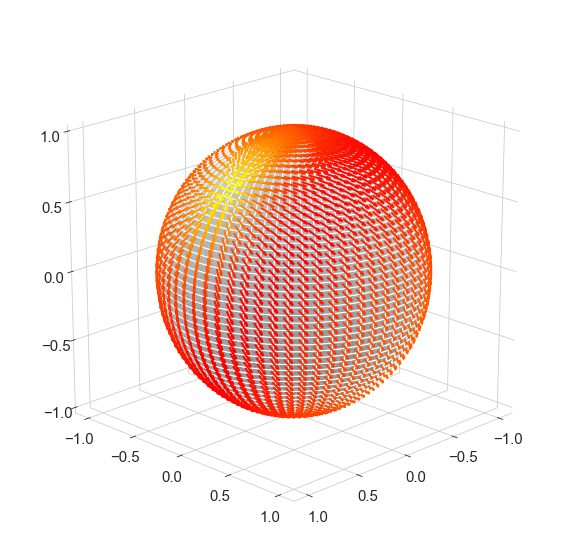

In [350]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# spherical grid
theta = np.linspace(0, 2*np.pi, 60)
phi = np.linspace(0, np.pi, 60)
r = 1

# cartesian grid
w1 = r * np.outer(np.cos(theta), np.sin(phi))
w2 = r * np.outer(np.sin(theta), np.sin(phi))
w3 = r * np.outer(np.ones(np.size(theta)), np.cos(phi))

# gradients
dw1, dw2, dw3 = scale_3D(w1, w2, w3)

# surface plot
ax.plot_surface(w1, w2, w3, rstride=1, cstride=1, color='w', shade=1, alpha=0.5)

# set viewing angle
azimuth, elev = 45, 20
ax.view_init(elev, azimuth )

# calculate the normal vector to the plane of vision
a = azimuth*np.pi/180. - np.pi
e = elev*np.pi/180. - np.pi/2.
n = [ np.sin(e) * np.cos(a),np.sin(e) * np.sin(a),np.cos(e)]

# condition where vectors are visable
dot = n[0]*w1 + n[1]*w2 + n[2]*w3
cond = (dot >= 0)

# filter points by the above condition
dw1_c, w1_c = dw1[cond], w1[cond]
dw2_c, w2_c = dw2[cond], w2[cond]
dw3_c, w3_c = dw3[cond], w3[cond]

# color map
c = np.sqrt(dw1_c**2 + dw2_c**2 + dw3_c**2).flatten()
c = (c.ravel() - c.min()) / c.ptp()
c = np.concatenate((c, np.repeat(c, 2)))

# quiver plot
q = ax.quiver(w1_c, w2_c, w3_c, dw1_c, dw2_c, dw3_c, length=0.1, normalize=True, lw=2, colors=plt.cm.autumn_r(c), pivot="middle")

# plot style
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_yticks([-r,-r/2,0,r/2,r])
ax.set_xticks([-r,-r/2,0,r/2,r])
ax.set_zticks([-r,-r/2,0,r/2,r])
ax.w_xaxis.pane.set_color('w');
ax.w_yaxis.pane.set_color('w');
ax.w_zaxis.pane.set_color('w');
plt.savefig('scale-3d.pdf', format='pdf', bbox_inches='tight')